In [1]:
using LinearAlgebra, StatsBase, Serialization, Distributions, StableDistributions, LaTeXStrings, Base.Threads, SharedArrays
using CairoMakie, Colors, ColorSchemes
# using Plots
include("../AdL.jl"); include("../Ad2L.jl"); include("../force.jl");

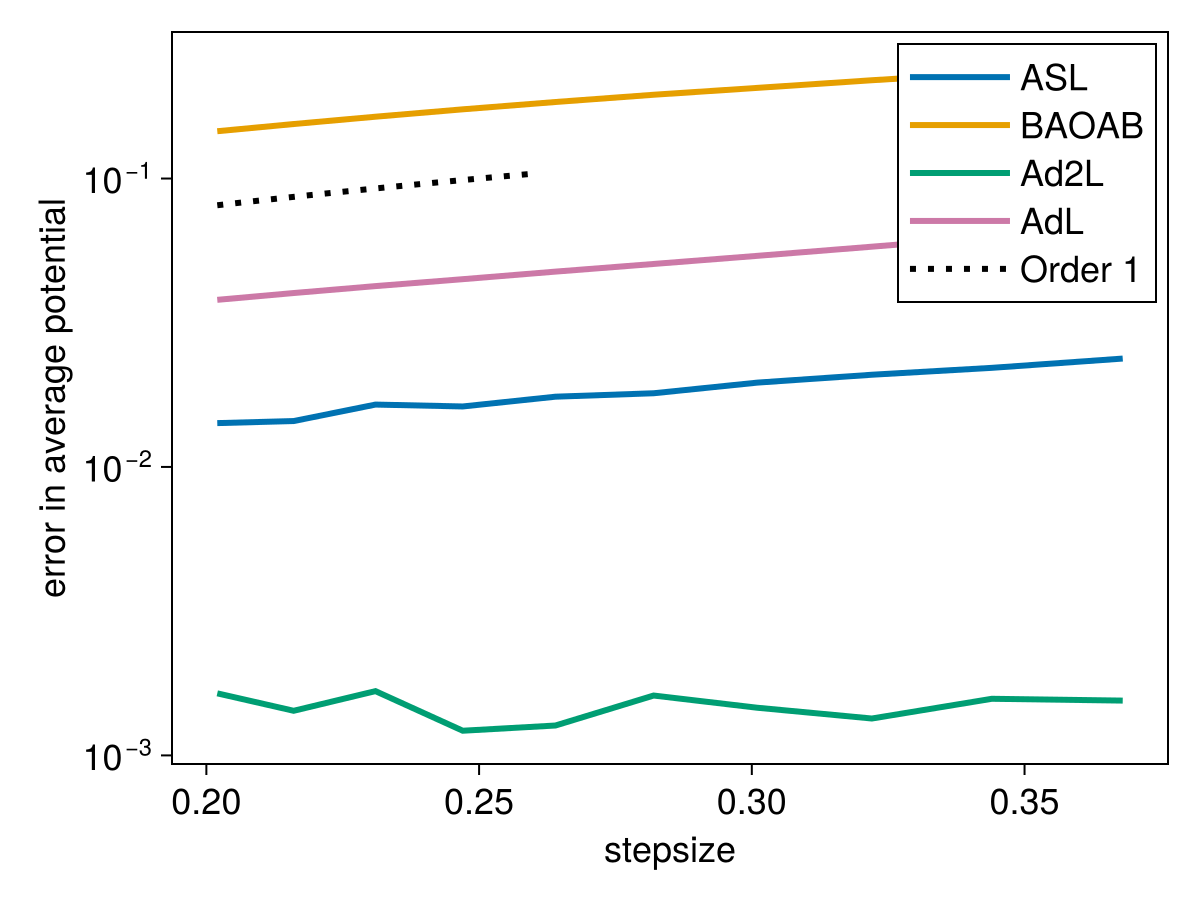

In [2]:
h_lst = [0.202, 0.216, 0.231, 0.247, 0.264, 0.282, 0.301, 0.322, 0.344,0.368]
bias_ASL = open(deserialize, "data/bias_ASL_mho.jls"); bias_ASL = [mean(bias_ASL[i,:]) for i in 1:length(h_lst)]
g_avg_ASL = open(deserialize, "data/g_avg_ASL_mho.jls"); g_avg_ASL = [mean(g_avg_ASL[i,:]) for i in 1:length(h_lst)]
bias_BAOAB = open(deserialize, "data/bias_BAOAB_mho.jls"); bias_BAOAB = [mean(bias_BAOAB[i,:]) for i in 1:length(h_lst)]
bias_Ad2L = open(deserialize, "data/bias_Ad2L_mho.jls"); bias_Ad2L = [mean(bias_Ad2L[i,:]) for i in 1:length(h_lst)]
g_avg_Ad2L = open(deserialize, "data/g_avg_Ad2L_mho.jls"); g_avg_Ad2L = [mean(g_avg_Ad2L[i,:]) for i in 1:length(h_lst)]
bias_AdL = open(deserialize, "data/bias_AdL_mho.jls"); bias_AdL = [mean(bias_AdL[i,:]) for i in 1:length(h_lst)];

fig = Figure(size=(600, 450), fontsize=18, linewidth=3)
ax = Axis(fig[1, 1], xlabel="stepsize", ylabel="error in average potential", yscale=log10)
ax.xgridvisible = false; ax.ygridvisible = false

lines!(ax, h_lst, bias_ASL, label="ASL")
lines!(ax, h_lst, bias_BAOAB, label="BAOAB")
lines!(ax, h_lst, bias_Ad2L, label="Ad2L")
lines!(ax, h_lst, bias_AdL, label="AdL")

xx = 0.202:0.001:0.260
lines!(ax, xx, 0.4*xx, color = :black, linestyle = :dot, label = "Order 1")
# xx = 0.252:0.001:0.301
# lines!(ax, xx, 0.11*xx.^2, color = :black, linestyle = :dash, label = "Order 2")

axislegend(ax, fontsize=28, position=:rt, patchsize = (50, 20))
# save("bias_noise.pdf", fig)
# save("bias_noise2.pdf", fig)
fig

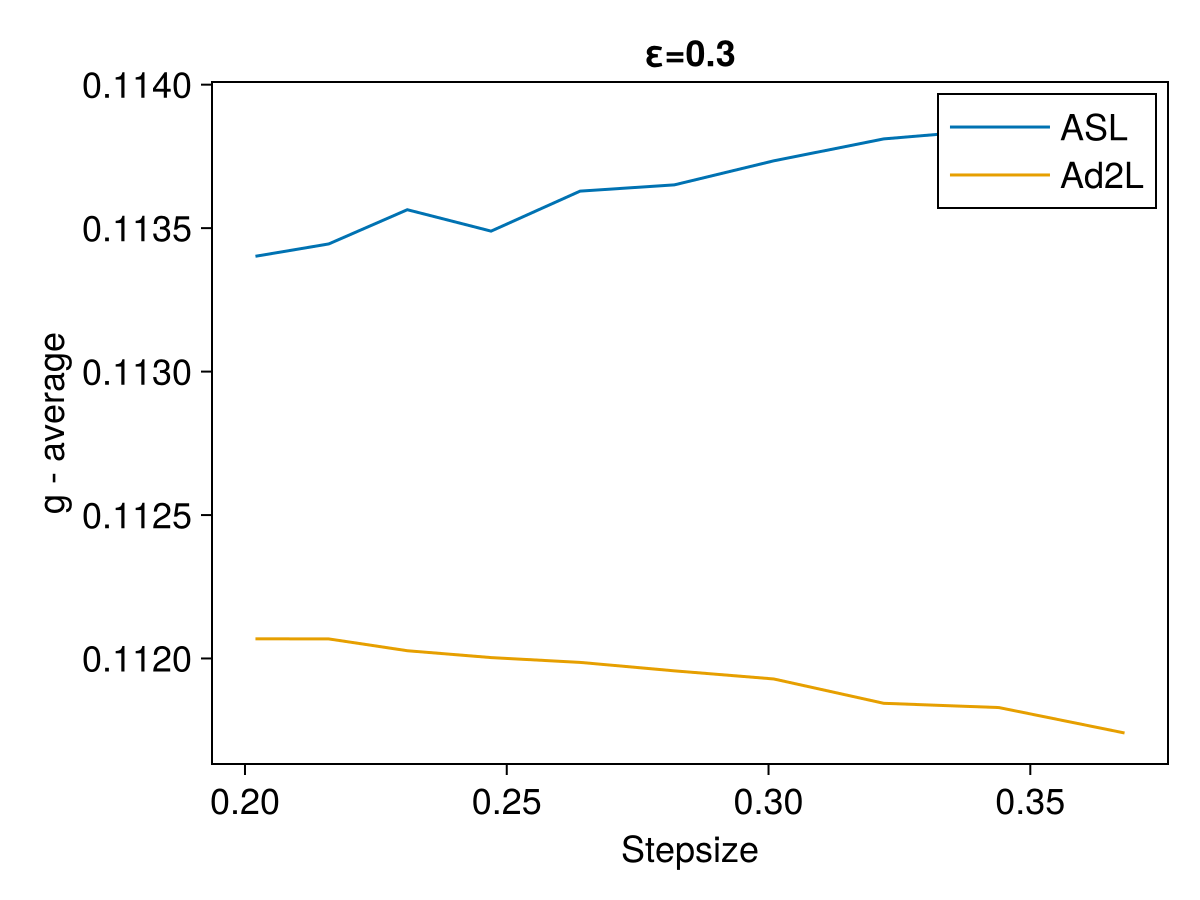

In [3]:
fig = Figure(size=(600, 450), fontsize=18)
ax = Axis(fig[1, 1], xlabel="Stepsize", ylabel="g - average", title="ε=0.3")
ax.xgridvisible = false; ax.ygridvisible = false
lines!(ax, h_lst, g_avg_ASL, label="ASL")
lines!(ax, h_lst, g_avg_Ad2L, label="Ad2L")

axislegend(ax, position=:rt, patchsize = (50, 20))
# save("g_avg_noise.pdf", fig)
fig

In [7]:
println(mean(g_avg_ASL), "   ", mean(g_avg_Ad2L))

0.11364718153976286   0.11194518624456413


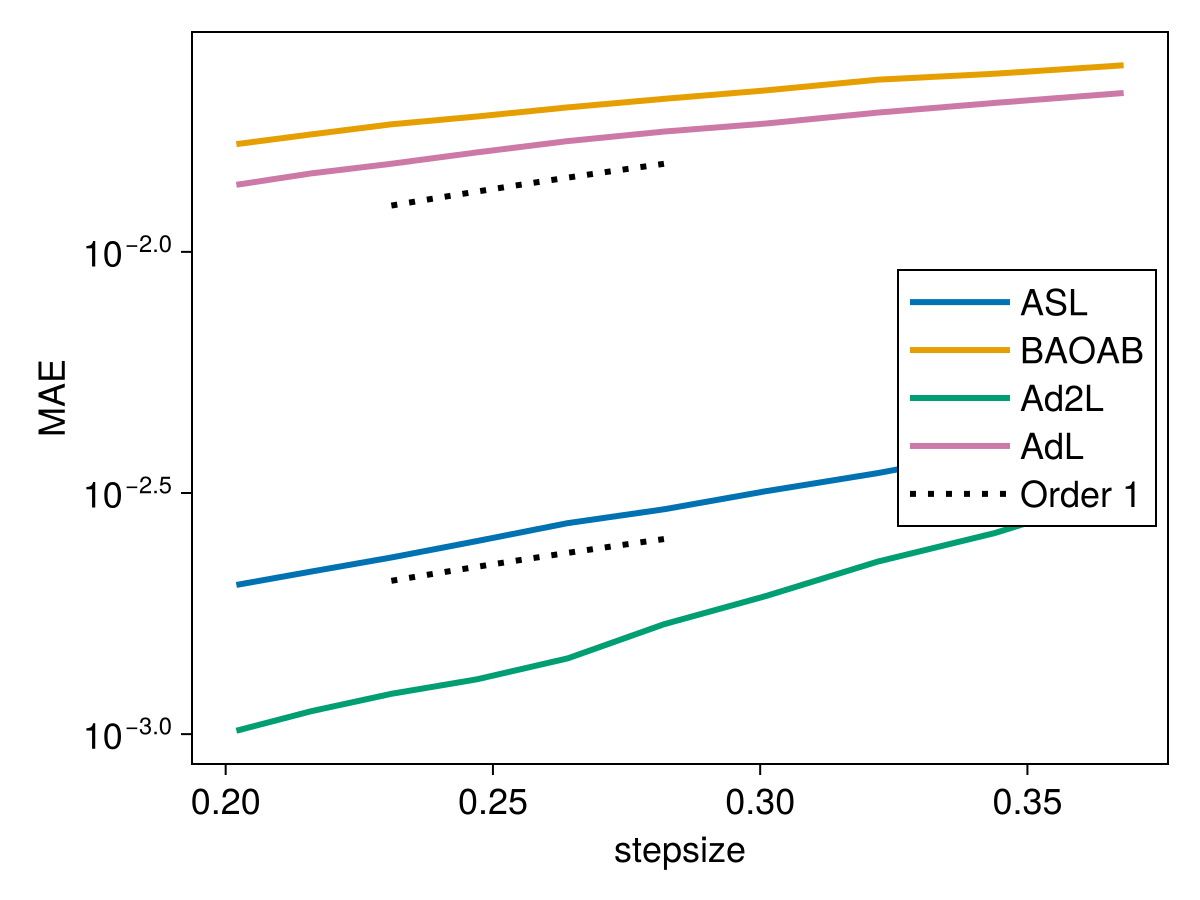

In [10]:
h_lst = [0.202, 0.216, 0.231, 0.247, 0.264, 0.282, 0.301, 0.322, 0.344,0.368]
bias_ASL_MAE = open(deserialize, "data/bias_ASL_mho_MAE.jls"); bias_ASL_MAE = [mean(bias_ASL_MAE[i,:]) for i in 1:length(h_lst)]
g_avg_ASL_MAE = open(deserialize, "data/g_avg_ASL_mho_MAE.jls"); g_avg_ASL_MAE = [mean(g_avg_ASL_MAE[i,:]) for i in 1:length(h_lst)]
bias_BAOAB_MAE = open(deserialize, "data/bias_BAOAB_mho_MAE.jls"); bias_BAOAB_MAE = [mean(bias_BAOAB_MAE[i,:]) for i in 1:length(h_lst)]
bias_Ad2L_MAE = open(deserialize, "data/bias_Ad2L_mho_MAE.jls"); bias_Ad2L_MAE = [mean(bias_Ad2L_MAE[i,:]) for i in 1:length(h_lst)]
g_avg_Ad2L_MAE = open(deserialize, "data/g_avg_Ad2L_mho_MAE.jls"); g_avg_Ad2L_MAE = [mean(g_avg_Ad2L_MAE[i,:]) for i in 1:length(h_lst)]
bias_AdL_MAE = open(deserialize, "data/bias_AdL_mho_MAE.jls"); bias_AdL_MAE = [mean(bias_AdL_MAE[i,:]) for i in 1:length(h_lst)];

fig = Figure(size=(600, 450), fontsize=18, linewidth=3)
ax = Axis(fig[1, 1], xlabel="stepsize", ylabel="MAE", yscale=log10)
ax.xgridvisible = false; ax.ygridvisible = false
lines!(ax, h_lst, bias_ASL_MAE, label="ASL")
lines!(ax, h_lst, bias_BAOAB_MAE, label="BAOAB")
lines!(ax, h_lst, bias_Ad2L_MAE, label="Ad2L")
lines!(ax, h_lst, bias_AdL_MAE, label="AdL")

xx = 0.231:0.001:0.282
lines!(ax, xx, 0.054*xx, color = :black, linestyle = :dot, label = "Order 1")

lines!(ax, xx, 0.009*xx, color = :black, linestyle = :dot)
# xx = 0.205:0.001:0.264
# lines!(ax, xx, 0.008*xx, color = :black, linestyle = :dot)


axislegend(ax, fontsize=28, position=:rc, patchsize = (50, 20))
# save("bias_noise_MAE.pdf", fig)
# save("bias_noise_MAE2.pdf", fig)
fig

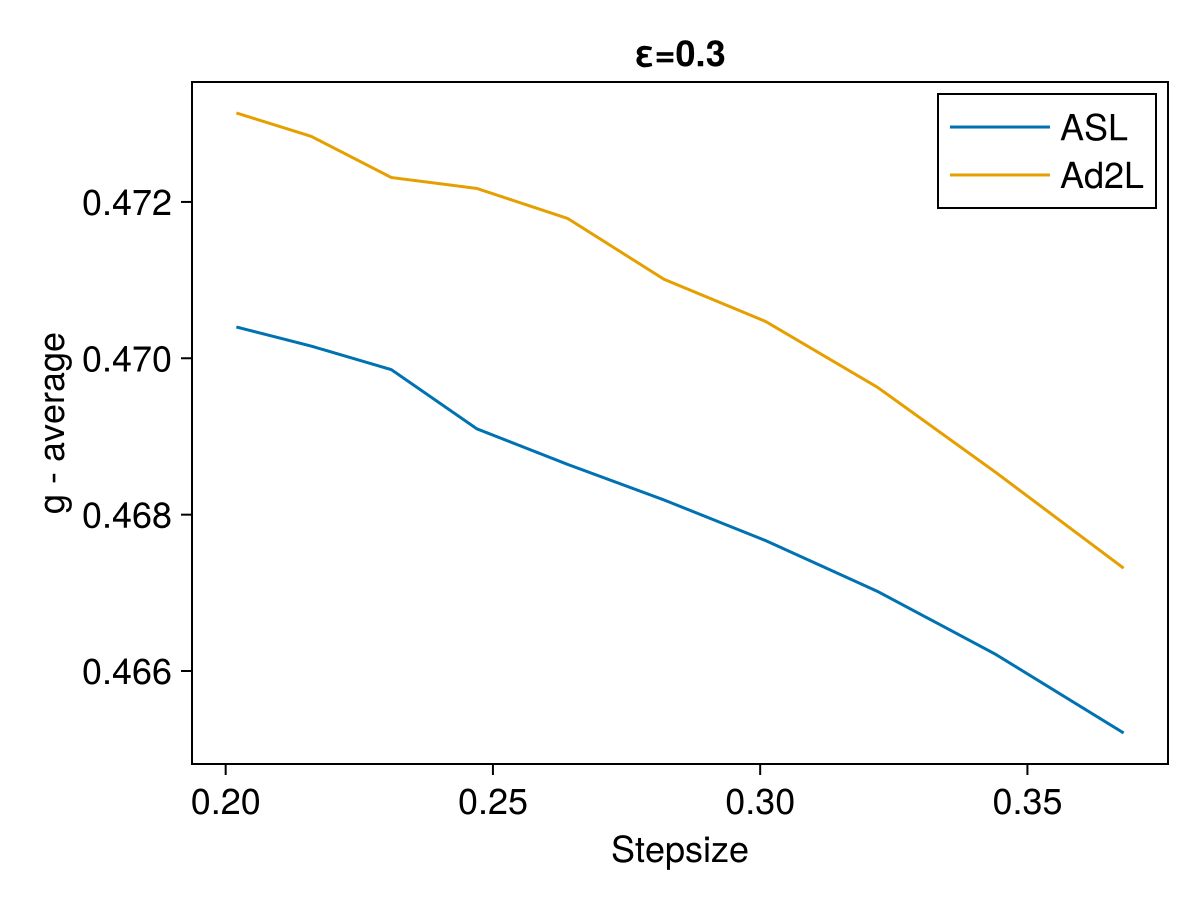

In [13]:
fig = Figure(size=(600, 450), fontsize=18)
ax = Axis(fig[1, 1], xlabel="Stepsize", ylabel="g - average", title="ε=0.3")
ax.xgridvisible = false; ax.ygridvisible = false
lines!(ax, h_lst, g_avg_ASL_MAE, label="ASL")
lines!(ax, h_lst, g_avg_Ad2L_MAE, label="Ad2L")

axislegend(ax, position=:rt, patchsize = (50, 20))
# save("g_avg_noise_MAE.pdf", fig)
fig

In [15]:
println(mean(g_avg_ASL_MAE), "   ", mean(g_avg_Ad2L_MAE))

0.46824439152673325   0.4709215570306872
